# Functions of the CCY - Castillo-Chavez and Yakabu SIS model

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Table of functions
| Function    | What it does  |
|:-------------|:-------------|
| CCY_bg       | given S,I, etc, returns the next time step  |
| T_plot_CCY | uses CCY_bg to determine T time steps and plots S,I,N  |
| TT_plot_CCY | identical to T_plot_CCY, but plots S, I, N on the same graph, visually better|
| M_plot_CCY | identical to TT_plot_CCY, but determines the effect of masks on the population (boolean) |
| M_compare_CCY | given the same parameters, plots masks vs no masks on the same graph |
| M_pct_CCY_plot | identical to M_plot_CCY, but allows for a *percentage* of the population to wear masks (not boolean) |
| TR_plot_CCY | identical to TT_plot_CCY, but determines the effect of a treatment on the population (boolean) |
| TR_compare_CCY | given the same paramters, plots treatment vs no treatment on the same graph |
| CCY_cvac | identical to CCY_bg, but considers a vaccination class |
| V_plot_CCY | uses CCY_cvac to determine T time steps and plots S,I,N |
| V_cmp_plot_CCY | given the same parameters, plots vaccinations vs no vaccinations on the same graph |

𝛾=  Probability of NOT dying

𝜎=  Probability of NOT recovering

T is the number of time steps you choose

br is the birth rate constant (pop growth is br x N)

g is the probability of NOT getting infected

In [2]:
# define a new CCY that depends on birth rate and prob. of NOT getting infected. 
def CCY_bg(S, I, gamma=0.9, sigma=0.2, br=0.004, g=0.7):
    S = br*(S+I) + gamma*S - gamma*S*(1-g) + (1-sigma)*gamma*I
    I = gamma*I - (1-sigma)*gamma*I + gamma*S*(1-g)
    return S, I, S+I

In [3]:
# Plotting the CCY function with time steps
def T_plot_CCY(S, I, gamma = 0.95, sigma = 0.05, br = 0.02, g= 0.8, T = 10):
    x = np.linspace(0, T, T+1)
    N = S+I
    S_list = []
    I_list = []
    N_list = []
    for t in x:
        S_list.append(S)
        I_list.append(I)
        N_list.append(N)
        S,I,N = CCY_bg(S, I, gamma, sigma, br, g)
        
    p = round(1 - g, 5)
    nd = round(1- gamma, 5)
    print('Your input: \n Population growth rate is {0}% and probability of infection is {1}%.\n The probability of NOT dying is {2}% and \n the probability of NOT recovering is {3}%.'.format(br*100, p*100, gamma*100, sigma*100))
    
    print('\n Population Growth Information: \n')
    if (nd) > br: 
        print ('The probability of dying is {0}% which is greater than the population growth rate, {1}%. \n This means that the total population decreases over time.'.format(nd*100, br*100))
    elif (nd) < br: 
        print ('The probability of dying is {0}% which is less than the population growth rate, {1}%. \n This means that the total population increases over time.'.format(nd*100, br*100))
    else: 
        print ('The probability of dying is {0}% which is the same as the population growth rate, {1}%. \n This means that the total population levels out over time.'.format(nd*100, br*100))
    
    #1. plotting time vs susceptible pop. 
    plt.plot(x, S_list, c='c', label='susceptible', marker='o')
    plt.xlabel('Time')
    plt.ylabel('Susceptible Population')
    plt.title('Susceptible Population with {0} time steps'.format(T))
    plt.show()
    
    #2. plotting time vs infected pop. 
    plt.plot(x, I_list, c='g', label='infected', marker='o')
    plt.xlabel('Time')
    plt.ylabel('Infected Population')
    plt.title('Infected Population with {0} time steps'.format(T))
    plt.show()
    
    #3. plotting time vs. total pop. 
    plt.plot(x, N_list, c='r', label='total', marker='o')
    plt.xlabel('Time')
    plt.ylabel('Total Population')
    plt.title('Total Population with {0} time steps'.format(T))
    plt.show()

Your input: 
 Population growth rate is 3.0% and probability of infection is 20.0%.
 The probability of NOT dying is 99.0% and 
 the probability of NOT recovering is 50.0%.

 Population Growth Information: 

The probability of dying is 1.0% which is less than the population growth rate, 3.0%. 
 This means that the total population increases over time.


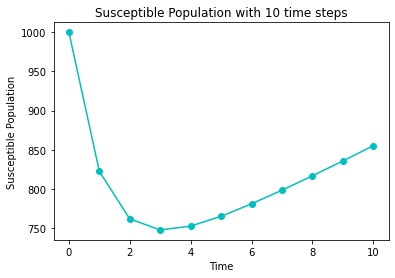

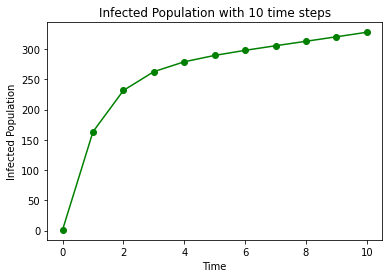

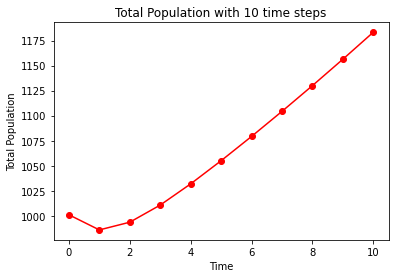

In [4]:
T_plot_CCY(1000, 1, 0.99, 0.5, 0.03, 0.8, 10)

In [5]:
# goal: create a new function that combines all of these pop. stats onto one graph. (see old function with separate graphs)

# Plotting the CCY function with time steps
def TT_plot_CCY(S, I, gamma = 0.95, sigma = 0.05, br = 0.02, g= 0.8, T = 10):
    x = np.linspace(0, T, T+1)
    N = S+I
    S_list = []
    I_list = []
    N_list = []
    for t in x:
        S_list.append(S)
        I_list.append(I)
        N_list.append(N)
        S,I,N = CCY_bg(S, I, gamma, sigma, br, g)
        
    p = round(1 - g, 5)
    nd = round(1- gamma, 5)
    print('Your input: \n Population growth rate is {0}% and probability of infection is {1}%.\n The probability of NOT dying is {2}% and \n the probability of NOT recovering is {3}%.'.format(br*100, p*100, gamma*100, sigma*100))
    
    print('\n Population Growth Information: \n')
    if (nd) > br: 
        print ('The probability of dying is {0}% which is greater than the population growth rate, {1}%. \n This means that the total population decreases over time.'.format(nd*100, br*100))
    elif (nd) < br: 
        print ('The probability of dying is {0}% which is less than the population growth rate, {1}%. \n This means that the total population increases over time.'.format(nd*100, br*100))
    else: 
        print ('The probability of dying is {0}% which is the same as the population growth rate, {1}%. \n This means that the total population levels out over time.'.format(nd*100, br*100))

    plt.plot(x, S_list, c='red', label='Susceptible', marker='o')
    plt.plot(x, I_list, c='y', label='Infected', marker='o')
    plt.plot(x, N_list, c='orange', label='Total', marker='o')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.title('Population Stats with {0} time steps'.format(T))
    plt.legend()
    plt.show()

Your input: 
 Population growth rate is 3.0% and probability of infection is 50.0%.
 The probability of NOT dying is 99.0% and 
 the probability of NOT recovering is 10.0%.

 Population Growth Information: 

The probability of dying is 1.0% which is less than the population growth rate, 3.0%. 
 This means that the total population increases over time.


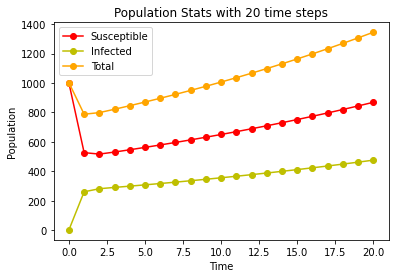

In [6]:
# TT_plot_CCY(Susceptible Pop, Infected Pop, prob of NOT dying, prob of NOT recovering, # of time steps, 
# birth rate, prob of NOT getting infected)
TT_plot_CCY(1000, 2, 0.99, 0.1, 0.03, 0.5, 20)

reduce transmission probability (like masks, hygiene practices)
recovery probability (treatment)
introduce recovered class- permanent immunity or not
vaccinated class

Consider ways to reduce transmission probability. 
- masks
- hygiene practices

Consider introducing a recovered class - permanent immunity (or not)

Vaccinated class

-- Reduce transmission probability --
From https://www.sciencedirect.com/science/article/pii/S0196655320310439 : 
Wearing a mask reduced transmission probability by 47% in non-healthcare workers

## What if we have masks? 

In [7]:
def M_plot_CCY(S, I, gamma = 0.95, sigma = 0.05, br = 0.02, g= 0.8, T = 10, m=True):
        
    p = round(1 - g, 5)
    nd = round(1- gamma, 5)
    print('Your input: \n Population growth rate is {0}% and probability of infection is {1}%.\n The probability of NOT dying is {2}% and \n the probability of NOT recovering is {3}%.'.format(br*100, p*100, gamma*100, sigma*100))
    
    nm = .53*p
    if m: 
        print ('\n Your population is wearing masks. This reduces the probability of infection by 47%. \nThis means the probability of infection is {0}%'.format(nm*100))
        g = 1 - nm
    else: print('\n Your population is not wearing masks. This does not reduce the probability of infection.')
    
    print('\n Population Growth Information: \n')
    if (nd) > br: 
        print ('The probability of dying is {0}% which is greater than the population growth rate, {1}%. \n This means that the total population decreases over time.'.format(nd*100, br*100))
    elif (nd) < br: 
        print ('The probability of dying is {0}% which is less than the population growth rate, {1}%. \n This means that the total population increases over time.'.format(nd*100, br*100))
    else: 
        print ('The probability of dying is {0}% which is the same as the population growth rate, {1}%. \n This means that the total population levels out over time.'.format(nd*100, br*100))

        
    X = np.linspace(0, T, T+1)
    N = S+I
    S_list = []
    I_list = []
    N_list = []
    for t in X:
        S_list.append(S)
        I_list.append(I)
        N_list.append(N)
        S,I,N = CCY_bg(S, I, gamma, sigma, br, g)
        
    plt.plot(X, S_list, c='red', label='Susceptible', marker='o')
    plt.plot(X, I_list, c='y', label='Infected', marker='o')
    plt.plot(X, N_list, c='orange', label='Total', marker='o')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.title('Population Stats with {0} time steps and Considering Mask-Wearing'.format(T))
    plt.legend()
    plt.show()

Your input: 
 Population growth rate is 3.0% and probability of infection is 90.0%.
 The probability of NOT dying is 99.0% and 
 the probability of NOT recovering is 10.0%.

 Your population is wearing masks. This reduces the probability of infection by 47%. 
This means the probability of infection is 47.7%

 Population Growth Information: 

The probability of dying is 1.0% which is less than the population growth rate, 3.0%. 
 This means that the total population increases over time.


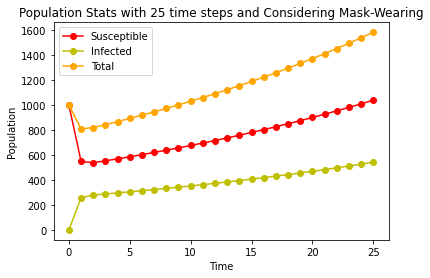

In [8]:
M_plot_CCY(1000, 2, 0.99, 0.1, 0.03, 0.1, 25, True)

In [9]:
def M_compare_CCY(S, I, gamma = 0.95, sigma = 0.05, br = 0.02, g= 0.8, T = 10):
    p = round(1-g, 5)
    newp = round(.53*p, 5)
    newpt = round(newp*100, 5)
    ng = round(1-newp, 5)
    print('Your input: \n Population growth rate is {0}% and probability of infection is {1}%.\n The probability of NOT dying is {2}% and \n the probability of NOT recovering is {3}%.'.format(br*100, p*100, gamma*100, sigma*100))
    print ('\n If your population is wearing masks, this reduces the probability of infection by 47%, \n so the probability of infection is {0}%'.format(newpt))
    
    Sm = S
    Snm = S
    Im = I
    Inm = I    
    Nm = S+I
    Nnm = S+I
    
    X = np.linspace(0, T, T+1)
    
    Sm_list = []
    Im_list = []
    Nm_list = []
    
    Snm_list = []
    Inm_list = []
    Nnm_list = []
    
    for t in X:
        Sm_list.append(Sm)
        Im_list.append(Im)
        Nm_list.append(Nm)
        
        Snm_list.append(Snm)
        Inm_list.append(Inm)
        Nnm_list.append(Nnm)
        
        Sm,Im,Nm = CCY_bg(Sm, Im, gamma, sigma, br, ng)
        Snm,Inm,Nnm = CCY_bg(Snm, Inm, gamma, sigma, br, g)
    
    plt.plot(X, Im_list, c='darkseagreen', label='Infected - Masks', marker='o')
    plt.plot(X, Nm_list, c='seagreen', label='Total - Masks', marker='o')
    plt.plot(X, Inm_list, c='lightcoral', label='Infected - No Masks', marker='o')
    plt.plot(X, Nnm_list, c='firebrick', label='Total - No Masks', marker='o')
    
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.title('No Masks or Masks: Population with {0} time steps'.format(T))
    plt.legend()
    plt.show()

Your input: 
 Population growth rate is 3.0% and probability of infection is 90.0%.
 The probability of NOT dying is 95.0% and 
 the probability of NOT recovering is 10.0%.

 If your population is wearing masks, this reduces the probability of infection by 47%, 
 so the probability of infection is 47.7%


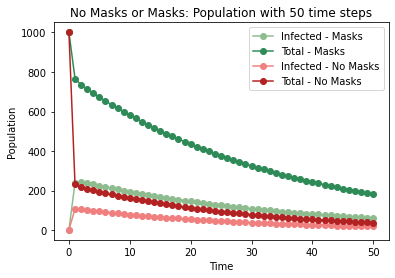

In [19]:
M_compare_CCY(1000, 1, 0.95, 0.1, 0.03, 0.1, 50)

### What if only some of the population were wearing masks? 

In [11]:
def Mpct_CCY_plot(S, I, gamma = 0.95, sigma = 0.05, br = 0.02, g= 0.8, T = 10, m= 1):
    nd = round(1- gamma, 5)  #probabilty of dying
    p = round(1 - g, 5)      #probability of infection
    mpct = round(m*100, 5)   #population wearing masks as a percent
    newp = round((1-.47*m)*p, 5) #new probability of infection considering newp
    newpt = round(newp*100, 5) #newp as a percent
    ng = round(1-newp, 5)     #new g for the CCY_bg function
    print('Your input: \n Population growth rate is {0}% and probability of infection is {1}%.\n The probability of NOT dying is {2}% and \n the probability of NOT recovering is {3}%.'.format(br*100, p*100, gamma*100, sigma*100))
    

    print('\n {0}% of your population are wearing masks. This has reduced the probability of infection to {1}%.'.format(mpct, newpt))
    
    print('\n Population Growth Information: \n')
    if (nd) > br: 
        print ('The probability of dying is {0}% which is greater than the population growth rate, {1}%. \n This means that the total population decreases over time.'.format(nd*100, br*100))
    elif (nd) < br: 
        print ('The probability of dying is {0}% which is less than the population growth rate, {1}%. \n This means that the total population increases over time.'.format(nd*100, br*100))
    else: 
        print ('The probability of dying is {0}% which is the same as the population growth rate, {1}%. \n This means that the total population levels out over time.'.format(nd*100, br*100))

        
    X = np.linspace(0, T, T+1)
    N = S+I
    S_list = []
    I_list = []
    N_list = []
    for t in X:
        S_list.append(S)
        I_list.append(I)
        N_list.append(N)
        S,I,N = CCY_bg(S, I, gamma, sigma, br, ng)
        
    plt.plot(X, S_list, c='red', label='Susceptible', marker='o')
    plt.plot(X, I_list, c='y', label='Infected', marker='o')
    plt.plot(X, N_list, c='orange', label='Total', marker='o')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.title('Stats with {0} time steps and {1}% of Population wearing masks'.format(T,mpct))
    plt.legend()
    plt.show()

Your input: 
 Population growth rate is 3.0% and probability of infection is 80.0%.
 The probability of NOT dying is 99.5% and 
 the probability of NOT recovering is 5.0%.

 20.0% of your population are wearing masks. This has reduced the probability of infection to 72.48%.

 Population Growth Information: 

The probability of dying is 0.5% which is less than the population growth rate, 3.0%. 
 This means that the total population increases over time.


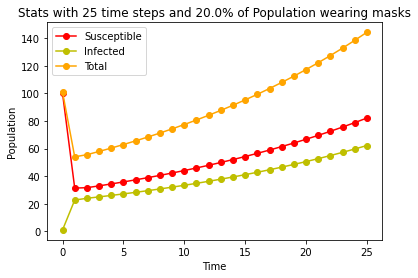

In [12]:
Mpct_CCY_plot(100, 1, 0.995, 0.05, 0.03, .2, 25, .2)

## What if we have better treatment? 
i.e. Increase recovery probability? Increase survival probability? 

anything in () is my comments or calculations. 


#### Ebola:
https://journals.plos.org/plosmedicine/article?id=10.1371/journal.pmed.1001815
Better treatment reduced EVD mortality. 
EVD had 50% mortality and the treatment reduced this stat by 6-15%. 
    
    
https://www.thelancet.com/journals/lancet/article/PIIS0140-6736(19)30242-9/fulltext
Says that EVD had 60-70% mortality in Central Africa. (Initially greater than 70%)
This number eventually dropped to 40% in Africa. With the cases that occured in North America and Europe, 
the mortality rate was 18.5%. 
(reduced mortality rate by 43%)



#### COVID-19: 
https://onlinelibrary.wiley.com/doi/full/10.1002/jmv.26035

Says COVID mortality rate began at 4% in Europe, overtime it lowered to 1%. (reduced mortality rate by 75%)
In China, the mortality rate began at 15%, then dropped to 11%, then to 3.4%. (reduced mortality rate by 77%)
But also has data for an increasing mortality rate?

Recovery rate:
2.1% to 46% (May 2020)
(increased recovery rate by (2100% ???)

Over time, increase recovery rate by 2.8%.



#### Black Plague: 
https://www.clausiuspress.com/assets/default/article/2021/11/10/article_1636593875.pdf
talks about Bubonic Plague, but also discusses SIR (good resource for Note down below)

##### We'll say a treatment will increase prob. of survival and recovery by 40% (up to 99%)

In [13]:
def TR_plot_CCY(S, I, gamma = 0.95, sigma = 0.05, br = 0.02, g= 0.8, T = 10, tt=True):
            
    p = round(1 - g, 5)
    nd = round(1- gamma, 5)
    nr = round(1-sigma, 5)
    print('Your input: \n Population growth rate is {0}% and probability of infection is {1}%.\n The probability of dying is {2}% and \n the probability of recovering is {3}%.'.format(br*100, p*100, 100 - gamma*100, 100 - sigma*100))
    
    nm = round(1.4*nr, 5)
    while nm > 1:
        nm -= .005
    if tt: 
        print ('\n Your population has a treatment. This increases the probability of recovery by 40%. \nThis means the probability of recovery is {0}%.'.format(nm*100))
        sigma = 1 - nm
        FF = 'a'
    else: 
        print('\n Your population does not have a treatment. This does not increase the probability of recovery.')
        FF = 'no'
    
    print('\n Population Growth Information: \n')
    if (nd) > br: 
        print ('The probability of dying is {0}% which is greater than the population growth rate, {1}%. \n This means that the total population decreases over time.'.format(nd*100, br*100))
    elif (nd) < br: 
        print ('The probability of dying is {0}% which is less than the population growth rate, {1}%. \n This means that the total population increases over time.'.format(nd*100, br*100))
    else: 
        print ('The probability of dying is {0}% which is the same as the population growth rate, {1}%. \n This means that the total population levels out over time.'.format(nd*100, br*100))

        
    X = np.linspace(0, T, T+1)
    N = S+I
    S_list = []
    I_list = []
    N_list = []
    for t in X:
        S_list.append(S)
        I_list.append(I)
        N_list.append(N)
        S,I,N = CCY_bg(S, I, gamma, sigma, br, g)
        
    plt.plot(X, S_list, c='red', label='Susceptible', marker='o')
    plt.plot(X, I_list, c='y', label='Infected', marker='o')
    plt.plot(X, N_list, c='orange', label='Total', marker='o')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.title('Population Stats with {0} time steps, with {1} Treatment'.format(T, FF))
    plt.legend()
    plt.show()

Your input: 
 Population growth rate is 3.0% and probability of infection is 90.0%.
 The probability of dying is 10.0% and 
 the probability of recovering is 50.0%.

 Your population has a treatment. This increases the probability of recovery by 40%. 
This means the probability of recovery is 70.0%.

 Population Growth Information: 

The probability of dying is 10.0% which is greater than the population growth rate, 3.0%. 
 This means that the total population decreases over time.


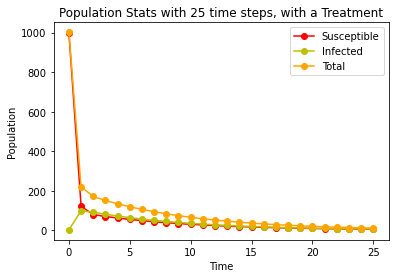

In [14]:
TR_plot_CCY(1000, 2, 0.9, 0.5, 0.03, 0.1, 25, True)

#### Let's compare the difference between a treatment and no treatment.

In [15]:
def TR_compare_CCY(S, I, gamma = 0.95, sigma = 0.05, br = 0.02, g= 0.8, T = 10):
    p = round(1 - g, 5)
    nr = round(1-sigma, 5)
    nd = round(1- gamma, 5)
    
    # there's a treatment, and we need to cap the growth at 99%
    tnr = round(1.4*nr, 5)
    while tnr > .99:
        tnr -= .005
    tsigma = round(1 - tnr, 5)
    
    print('Your input: \n Population growth rate is {0}% and probability of infection is {1}%.\n The probability of dying is {2}% and \n the probability of recovering is {3}%.'.format(br*100, p*100, 100*nd, 100*nr))
    print ('\n If your population has a treatment, the probability of recovery increases from {0}% to {1}%. \n Otherwise, the probability of recovery remains at {2}%'.format(nr*100, tnr*100, nr*100))
    
    
    if (nd) > br: 
        print ('The probability of dying is {0}% which is greater than the population growth rate, {1}%. \n This means that the total population decreases over time.'.format(nd*100, br*100))
    elif (nd) < br: 
        print ('The probability of dying is {0}% which is less than the population growth rate, {1}%. \n This means that the total population increases over time.'.format(nd*100, br*100))
    else: 
        print ('The probability of dying is {0}% which is the same as the population growth rate, {1}%. \n This means that the total population levels out over time.'.format(nd*100, br*100))
    
    
    X = np.linspace(0, T, T+1)
    Snt = S
    St = S
    Int = I
    It = I
    Nnt = Snt+Int
    Nt = St+It
    
    Snt_list = []
    Int_list = []
    Nnt_list = []
    St_list = []
    It_list = []
    Nt_list = []
    
    for t in X:
        Snt_list.append(Snt)
        Int_list.append(Int)
        Nnt_list.append(Nnt)
        Snt,Int,Nnt = CCY_bg(Snt, Int, gamma, sigma, br, g)
        
        St_list.append(St)
        It_list.append(It)
        Nt_list.append(Nt)
        St,It,Nt = CCY_bg(St, It, gamma, tsigma, br, g)
        
    plt.plot(X, It_list, c='darkseagreen', label='Infected - Treatment', marker='o')
    plt.plot(X, Nt_list, c='seagreen', label='Total - Treatment', marker='o')
    plt.plot(X, Int_list, c='lightcoral', label='Infected - No Treatment', marker='o')
    plt.plot(X, Nnt_list, c='firebrick', label='Total - No Treatment', marker='o')
    
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.title('Population with {0} time steps'.format(T))
    plt.legend()
    plt.show()

Your input: 
 Population growth rate is 3.0% and probability of infection is 80.0%.
 The probability of dying is 5.0% and 
 the probability of recovering is 20.0%.

 If your population has a treatment, the probability of recovery increases from 20.0% to 28.000000000000004%. 
 Otherwise, the probability of recovery remains at 20.0%
The probability of dying is 5.0% which is greater than the population growth rate, 3.0%. 
 This means that the total population decreases over time.


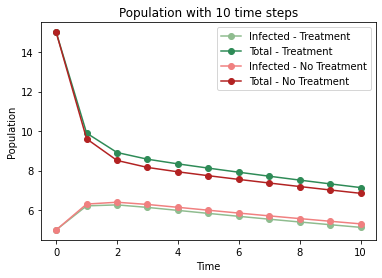

In [16]:
TR_compare_CCY(10, 5, 0.95, 0.8, 0.03, 0.2, 10)

In [17]:
TR_compare_CCY(*Std)

NameError: name 'Std' is not defined

### Quick brainstorm: "Standardize" the input so it is easier to put into function. 

In [ ]:
Std = [1000, 1, .95, .1, 0.03, .6, 25]

In [ ]:
TT_plot_CCY(*Std)

In [ ]:
TR_plot_CCY(*Std, True)

## What if we have a combination of different control strategies? 
say we have masks and treatment 

## What if we have a cure? 

## What if we have a vaccine? 
Vaccinated individuals will have permanent immunity. They will be removed from susceptible populations but kept in the total population statistic. 

In [ ]:
def CCY_cvac(S, I, gamma=0.95, sigma=0.1, br=0.02, g=0.4, v=0.01): #cvac meaning constant vaccination rate
    V = v*(S+I)
    S = br*(S+I) + gamma*S - gamma*S*(1-g) + (1-sigma)*gamma*I - V #removing vaccinated pop.
    I = gamma*I - (1-sigma)*gamma*I + gamma*S*(1-g)
    return S, I, V, S+I+V

In [ ]:
# from notes from meeting
# p is the probability of being vaccinated
S = br*(S+I) + gamma*S - gamma*S*(1-g) + (1-sigma)*gamma*I - gamma*S*g(1-p)
I = gamma*I - 


## brainstorm on infected class equation

In [ ]:
#CCY_cvac(1000, 2, 0.99, 0.1, 0.03, 0.5, 0.01)    
S = 1000
I = 2
gamma = 0.99
sigma = 0.1
br = 0.1
g = 0.7
v = 0.01
T = 3
x = np.linspace(0, T, T+1)
N = S+I
S_list = []
I_list = []
V_list = [0]
N_list = []
for t in range(T+1):
    S_list.append(S)
    I_list.append(I)
    N_list.append(N)
    S, I, V, N = CCY_cvac(S, I, gamma, sigma, br, g, v)
    V_list.append(V)

V_tot = []
for i in range(T+1):
    sum = 0
    j = 0
    while j <= i:
        sum += V_list[j]
        j += 1
    V_tot.append(sum)

print('domain: {0}'.format(x))
print('Susceptible: {0}'.format(S_list))
print('Infected: {0}'.format(I_list))
print('Vaccinated: {0}'.format(V_tot))
print('Total: {0}'.format(N_list)) 

In [ ]:
def V_plot_CCY(S, I, gamma = 0.95, sigma = 0.05, br = 0.02, g= 0.3, T = 10, v=0.01):
    
    x = np.linspace(0, T, T+1)
    N = S+I
    V = 0
    S_list = []
    I_list = []
    V_list = []
    N_list = []
    for t in x:
        S_list.append(S)
        I_list.append(I)
        N_list.append(N)
        S,I,V,N = CCY_cvac(S, I, gamma, sigma, br, g, v)
        V_list.append(V)
        
    V_tot = []
    for i in range(T+1):
        sum = 0
        j = 0
        while j <= i:
            sum += V_list[j]
            j += 1
        V_tot.append(sum)

        
    p = round(1 - g, 5)
    nd = round(1- gamma, 5)
    print('Your input: \n Population growth rate is {0}% and probability of infection is {1}%.\n The probability of NOT dying is {2}% and \n the probability of NOT recovering is {3}%.'.format(br*100, p*100, gamma*100, sigma*100))
    
    print('\n Population Growth Information: \n')
    if (nd) > br: 
        print ('The probability of dying is {0}% which is greater than the population growth rate, {1}%. \n This means that the total population decreases over time.'.format(nd*100, br*100))
    elif (nd) < br: 
        print ('The probability of dying is {0}% which is less than the population growth rate, {1}%. \n This means that the total population increases over time.'.format(nd*100, br*100))
    else: 
        print ('The probability of dying is {0}% which is the same as the population growth rate, {1}%. \n This means that the total population levels out over time.'.format(nd*100, br*100))

    plt.plot(x, I_list, c='y', label='Infected', marker='o')
    plt.plot(x, V_tot, c='orange', label='Vaccinated', marker='o')
    plt.plot(x, N_list, c='g', label='Total', marker='o')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.title('Population Stats with {0} time steps and {1}% of the population vaccinated at each time step'.format(T, round(v*100,5)))
    plt.legend()
    plt.show()

In [ ]:
V_plot_CCY(1000, 2, 0.9, 0.2, 0.05, 0.9, 25, 0.01)

### What is the difference between vaccinations and no vaccinations? 

In [ ]:
def Vcmp_plot_CCY(S, I, gamma = 0.95, sigma = 0.05, br = 0.02, g= 0.8, T = 10, v=0.01):
    p = round(1-g, 5)
    vpt = round(v*100, 5)
    print('Your input: \n Population growth rate is {0}% and probability of infection is {1}%.\n The probability of NOT dying is {2}% and \n the probability of NOT recovering is {3}%.'.format(br*100, p*100, gamma*100, sigma*100))
    
    Sv = S
    Snv = S
    Iv = I
    Inv = I    
    Nv = S+I
    Nnv = S+I
    
    X = np.linspace(0, T, T+1)
    
    Iv_list = []
    Nv_list = []
    
    Inv_list = []
    Nnv_list = []
    
    for t in X:
        Iv_list.append(Iv)
        Nv_list.append(Nv)

        Inv_list.append(Inv)
        Nnv_list.append(Nnv)
        
        Sv, Iv, V, Nv = CCY_cvac(Sv, Iv, gamma, sigma, br, g, v)
        Snv, Inv, Nnv = CCY_bg(Snv, Inv, gamma, sigma, br, g)
    
    plt.plot(X, Iv_list, c='darkseagreen', label='Infected - {0}% Vacc. p.t.s.'.format(vpt), marker='o')
    plt.plot(X, Nv_list, c='seagreen', label='Total - {0}% Vacc. p.t.s.'.format(vpt), marker='o')
    plt.plot(X, Inv_list, c='lightcoral', label='Infected - No Vaccine', marker='o')
    plt.plot(X, Nnv_list, c='firebrick', label='Total - No Vaccine', marker='o')
    
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.title('Vaccine or No Vaccine: Population with {0} time steps and {1}% Vaccinated per Time Step'.format(T, vpt))
    plt.legend()
    plt.show()

In [ ]:
Vcmp_plot_CCY(1000, 1, 0.95, 0.05, 0.02, 0.8, 10, 0.01)

### Note: Figure out a different way to talk about vaccinated population 
What is a better way to introduce a new class? Right now the vaccinated isn't a "class," it's a percentage of the total population that I subtract from the susceptible population each time step. So this isn't the best way to represent the vaccinated population. 


#### SIR disease model

Simple Compartmental Models for Disease Transmission (Brauer, Castillo-Chavez, Feng) mentions the SIR model. 

https://link.springer.com/chapter/10.1007/978-1-4939-9828-9_2#Sec3

SIR Research Paper (Alger, Todd) 

http://web.simmons.edu/~grigorya/390/projects/Charlotte-Kaitlin_Epidemics.pdf


Brauer's equations: 

𝑆′=−𝛽𝑆𝐼+𝜇(𝑁−𝑆)

𝐼′=𝛽𝑆𝐼−𝛼𝐼−𝜇𝐼

𝑅′=𝛼𝐼−𝜇𝑅.

## Table of functions
| Function    | What it does  |
|:-------------|:-------------|
| CCY_bg       | given S,I, etc, returns the next time step  |
| T_plot_CCY | uses CCY_bg to determine T time steps and plots S,I,N  |
| TT_plot_CCY | identical to T_plot_CCY, but plots S, I, N on the same graph, visually better|
| M_plot_CCY | identical to TT_plot_CCY, but determines the effect of masks on the population (boolean) |
| M_compare_CCY | given the same parameters, plots masks vs no masks on the same graph |
| M_pct_CCY_plot | identical to M_plot_CCY, but allows for a *percentage* of the population to wear masks (not boolean) |
| TR_plot_CCY | identical to TT_plot_CCY, but determines the effect of a treatment on the population (boolean) |
| TR_compare_CCY | given the same paramters, plots treatment vs no treatment on the same graph |
| CCY_cvac | identical to CCY_bg, but considers a vaccination class |
| V_plot_CCY | uses CCY_cvac to determine T time steps and plots S,I,N |
| V_cmp_plot_CCY | given the same parameters, plots vaccinations vs no vaccinations on the same graph |

idea to import functions into a different notebook to be more organized. 

run % # name of jupyter notebook. 